In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

In [2]:
weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W

p=200
n_wait=5

In [3]:
sample=200
A_cuts=30
move_cuts=1

In [4]:
alpha_s=np.linspace(0.995, 0.99995, A_cuts)
move_s=np.linspace(1, 1, move_cuts)

In [5]:
move_s

array([ 1.])

In [6]:
for ll in range(move_cuts):
    res=np.zeros((A_cuts, sample))
    res2=np.zeros((A_cuts, sample))
    res3=np.zeros((A_cuts, sample))

    for jj in range(sample):
        q_s=[]
        q2_s=[]
        qt_s=[]

        for ii in range(A_cuts):
            start=time.time()
            alpha=alpha_s[ii]
            wait_time=int(1/(1-alpha))
            N_grid=wait_time*n_wait
            n=N_grid/p
            L=T*n

            t=np.linspace(0,L,N_grid)
            h=t[1]-t[0]

            st=int(p/2)
            fn=N_grid-1-st

            M=2*dw

            move=int(move_s[ll])

            t_t=np.linspace(0, L+wait_time/p, N_grid+wait_time)
            k0_t=np.zeros(N_grid+wait_time, np.dtype(float))


            sigma=.01
            mu=(2*dw+sigma*move)*(1-alpha)
            np.random.seed
            xi=sigma*np.random.randn(N_grid+wait_time-1)+mu


            for i in range(N_grid+wait_time):
                if i==0:
                    k0_t[i]=2*dw
                else:
                    k0_t[i]=alpha*k0_t[i-1]+xi[i-1]
            k0=np.zeros(N_grid, np.dtype(float))
            k0=k0_t[int(1/(1-alpha)):]
            if k0[0]<2*dw:
                k0[0]=2*dw+sigma*move
                print("ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ")

            k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
            f=lambda t, x: 2*dw-k0_f(t)*sin(x)

            init=np.arcsin(2*dw/k0[0])

            theta=[0]*N_grid
            for i in range(N_grid):
                if i==0:
                    theta[i]=init
                else:
                    k1=f(t[i-1], theta[i-1])*h
                    k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
                    k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
                    k4=f(t[i-1]+h, theta[i-1]+k3)*h

                    theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

            theta=np.array(theta)
            x0=np.sin(W*t)
            y0=np.sin(W*t+theta)

            C_0=[0]*N_grid

            for i in range(N_grid):
                if (t[i]-T/2>=0) and (t[i]+T/2<=L):
                    C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
                else:
                    C_0[i]=nan

            phi0=np.arccos(C_0)

            k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

            q_t_ar=[]

            for i in range(fn-p-st):
                mk=np.array([np.mean(k0[st+i:st+i+p-1])]*p)
                sk=(sum(np.multiply(k0[st+i:st+i+p-1], k0[st+i:st+i+p-1])*h))
                q_t_ar.append((sum(np.multiply(k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1], k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1])*h))/sk)

            qt=max(q_t_ar)
            if qt>.8:
                qt_s.append(1)
            else:
                qt_s.append(0)
            mk=np.array([np.mean(k0[st:fn])]*(fn-st))
            sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
            q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
            sk2=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
            q2=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk2
            q_s.append(q)
            q2_s.append(q2)
            stop=time.time()
            print(ll, '/', jj, '/', ii, alpha, ' ----- ', stop-start, '-------------', q, q2, qt_s[-1])
        res[:,jj]=q_s
        res2[:,jj]=q2_s
        res3[:,jj]=qt_s

    np.savetxt('PT30('+str(move)+')10_20_8000_q_A_cor.out', res, delimiter=',')
    np.savetxt('PT30('+str(move)+')10_20_8000_q2_A_cor.out', res2, delimiter=',')
    np.savetxt('PT30('+str(move)+')10_20_8000_q3_A_cor.out', res3, delimiter=',')

0 / 0 / 0 0.995  -----  0.5292394161224365 ------------- 1.75556361701 0.000743656134286 0
0 / 0 / 1 0.995170689655  -----  0.7373778820037842 ------------- 1.46398238777 0.000722463236095 0
0 / 0 / 2 0.99534137931  -----  0.6203422546386719 ------------- 0.825992163825 0.00319203111568 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 0 / 3 0.995512068966  -----  0.6688899993896484 ------------- 1.33218133025 0.00388478929313 0
0 / 0 / 4 0.995682758621  -----  0.6915724277496338 ------------- 1.00159336394 0.00109572704985 0
0 / 0 / 5 0.995853448276  -----  0.7285711765289307 ------------- 1.07898076946 0.000623676547959 0
0 / 0 / 6 0.996024137931  -----  0.724543571472168 ------------- 1.00688623854 0.00135773174954 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 0 / 7 0.996194827586  -----  0.8038866519927979 ------------- 1.09177241839 0.00241977974666 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 0 / 8 0.996365517241  -----  0.8059940338134766 ------------- 0.997088809884 0.00199829174878 0
0 / 0 / 9 0.996536206897  -----  0

0 / 2 / 15 0.997560344828  -----  1.3343744277954102 ------------- 0.734296009579 0.00202307795198 0
0 / 2 / 16 0.997731034483  -----  1.4813964366912842 ------------- 29.6836315929 0.22861904318 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 2 / 17 0.997901724138  -----  1.5790069103240967 ------------- 95.4916317429 0.21948795666 1
0 / 2 / 18 0.998072413793  -----  1.7240955829620361 ------------- 0.56054388248 0.00130353462564 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 2 / 19 0.998243103448  -----  1.9106314182281494 ------------- 12.8095177679 0.131087197037 1
0 / 2 / 20 0.998413793103  -----  2.1204729080200195 ------------- 34.0618620356 0.150397994418 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 2 / 21 0.998584482759  -----  2.411825656890869 ------------- 80.9249592765 0.311144772143 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 2 / 22 0.998755172414  -----  2.7414088249206543 ------------- 19.2701616271 0.105596336887 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 2 / 23 0.998925862069  -----  3.1729884147644043 ------------- 36.977896811

ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 4 / 29 0.99995  -----  69.93809413909912 ------------- 2.34366017566 0.33665473513 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 5 / 0 0.995  -----  0.62874436378479 ------------- 37.2807753717 0.0613426333231 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 5 / 1 0.995170689655  -----  0.6240983009338379 ------------- 0.96448386624 0.00266228985473 0
0 / 5 / 2 0.99534137931  -----  0.6623761653900146 ------------- 2.28936129722 0.00533941444691 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 5 / 3 0.995512068966  -----  0.718712329864502 ------------- 10.9140582715 0.0127975856942 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 5 / 4 0.995682758621  -----  0.7996885776519775 ------------- 1.1437169934 0.0020462258122 0
0 / 5 / 5 0.995853448276  -----  0.8061606884002686 ------------- 0.642298325886 0.00152769650185 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 5 / 6 0.996024137931  -----  0.9745721817016602 ------------- 1.08205021535 0.00141656189598 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 5 / 7 0.996194827586  -----  0.9125847816

0 / 7 / 13 0.997218965517  -----  1.167492389678955 ------------- 0.947945672685 0.00106829529873 0
0 / 7 / 14 0.997389655172  -----  1.2484550476074219 ------------- 0.952110468469 0.00156503550714 0
0 / 7 / 15 0.997560344828  -----  1.3325815200805664 ------------- 0.991048302024 0.00543005410651 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 7 / 16 0.997731034483  -----  1.4355602264404297 ------------- 118.852722794 0.192364609488 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 7 / 17 0.997901724138  -----  1.6494507789611816 ------------- 25.805525047 0.183177189473 1
0 / 7 / 18 0.998072413793  -----  1.800842523574829 ------------- 0.83921676801 0.00307989220008 0
0 / 7 / 19 0.998243103448  -----  1.9093501567840576 ------------- 0.840936724177 0.00116278147441 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 7 / 20 0.998413793103  -----  2.115927219390869 ------------- 0.690178504136 0.00338442906506 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 7 / 21 0.998584482759  -----  2.3676555156707764 ------------- 27.950756935 0.11282305647 1

0 / 9 / 26 0.999437931034  -----  6.0303425788879395 ------------- 0.48487881072 0.00265201949359 0
0 / 9 / 27 0.99960862069  -----  8.749531030654907 ------------- 25.2265946734 0.581748605045 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 9 / 28 0.999779310345  -----  15.569342613220215 ------------- 2.66245955285 0.0882989538244 1
0 / 9 / 29 0.99995  -----  69.76398801803589 ------------- 2.27049544171 0.172141725747 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 10 / 0 0.995  -----  0.6106781959533691 ------------- 1.25990606442 0.00127611358415 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 10 / 1 0.995170689655  -----  0.641324520111084 ------------- 9.643670095 0.00764876681579 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 10 / 2 0.99534137931  -----  0.6671185493469238 ------------- 1.3187660542 0.00143847582761 0
0 / 10 / 3 0.995512068966  -----  0.6941666603088379 ------------- 0.676400386735 0.00260850731031 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 10 / 4 0.995682758621  -----  0.7060956954956055 ------------- 48.7843479383 0.2071260618

0 / 12 / 8 0.996365517241  -----  0.9023170471191406 ------------- 2.37378773988 0.0047007037142 0
0 / 12 / 9 0.996536206897  -----  0.9024009704589844 ------------- 0.99010018109 0.00189178267649 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 12 / 10 0.996706896552  -----  0.9586215019226074 ------------- 0.890169949935 0.0031134263983 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 12 / 11 0.996877586207  -----  1.009601354598999 ------------- 1.02608537299 0.00170822081502 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 12 / 12 0.997048275862  -----  1.0788679122924805 ------------- 33.567138282 0.169216655549 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 12 / 13 0.997218965517  -----  1.1540982723236084 ------------- 1.01970252769 0.000473964769488 0
0 / 12 / 14 0.997389655172  -----  1.252263069152832 ------------- 1.05628291425 0.002472563402 0
0 / 12 / 15 0.997560344828  -----  1.3860292434692383 ------------- 0.923110570855 0.00203065311488 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 12 / 16 0.997731034483  -----  1.43308424949646 -------------

0 / 14 / 20 0.998413793103  -----  2.0950160026550293 ------------- 37.9871171808 0.151624970491 1
0 / 14 / 21 0.998584482759  -----  2.3355720043182373 ------------- 0.868098808184 0.00429663753141 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 14 / 22 0.998755172414  -----  2.6894922256469727 ------------- 27.5406696741 0.285321914819 1
0 / 14 / 23 0.998925862069  -----  3.1629929542541504 ------------- 44.4111176086 0.191479690371 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 14 / 24 0.999096551724  -----  3.7085471153259277 ------------- 26.8667783662 0.285563316708 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 14 / 25 0.999267241379  -----  4.606290340423584 ------------- 11.7534969477 0.0566990751978 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 14 / 26 0.999437931034  -----  6.079890489578247 ------------- 8.61883813688 0.255024247945 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 14 / 27 0.99960862069  -----  8.718560934066772 ------------- 12.419530243 0.2219018045 1
0 / 14 / 28 0.999779310345  -----  15.543411493301392 ------------- 3.871474

0 / 17 / 3 0.995512068966  -----  0.7008812427520752 ------------- 1.16147256423 0.00208252496708 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 17 / 4 0.995682758621  -----  0.7147607803344727 ------------- 1.65427603604 0.00357432729342 0
0 / 17 / 5 0.995853448276  -----  0.7533845901489258 ------------- 0.812199713527 0.000869439651224 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 17 / 6 0.996024137931  -----  0.7975313663482666 ------------- 1.10707500015 0.000639789320263 0
0 / 17 / 7 0.996194827586  -----  0.8062608242034912 ------------- 0.622846028145 0.00146554237916 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 17 / 8 0.996365517241  -----  0.8835115432739258 ------------- 142.246908353 0.367944829472 1
0 / 17 / 9 0.996536206897  -----  0.9367485046386719 ------------- 0.984804625119 0.00309223786638 0
0 / 17 / 10 0.996706896552  -----  0.951040506362915 ------------- 1.01456188574 0.00234386738271 0
0 / 17 / 11 0.996877586207  -----  1.0246827602386475 ------------- 1.3559532207 0.00361820278117 0
0 / 17 / 12 0.99

0 / 19 / 17 0.997901724138  -----  1.5286815166473389 ------------- 35.8114879623 0.171572890641 1
0 / 19 / 18 0.998072413793  -----  1.7030787467956543 ------------- 0.923025341775 0.0033922774593 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 19 / 19 0.998243103448  -----  1.866873025894165 ------------- 22.9210783526 0.109212241964 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 19 / 20 0.998413793103  -----  2.068523645401001 ------------- 25.9620285301 0.129264133266 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 19 / 21 0.998584482759  -----  2.349334716796875 ------------- 95.4622496116 0.339647073332 1
0 / 19 / 22 0.998755172414  -----  2.72884202003479 ------------- 0.371985092637 0.00169111135804 0
0 / 19 / 23 0.998925862069  -----  3.121380567550659 ------------- 24.3210384022 0.111400482501 1
0 / 19 / 24 0.999096551724  -----  3.766007661819458 ------------- 0.587624023608 0.00179222175096 0
0 / 19 / 25 0.999267241379  -----  4.589639186859131 ------------- 0.404457086275 0.00152597445697 0
0 / 19 / 26 0.99943793103

0 / 22 / 2 0.99534137931  -----  0.6475458145141602 ------------- 2.12958190129 0.00237669251669 0
0 / 22 / 3 0.995512068966  -----  0.7013888359069824 ------------- 1.2812021726 0.00196629345362 0
0 / 22 / 4 0.995682758621  -----  0.7225556373596191 ------------- 2.99974722227 0.0130301612479 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 22 / 5 0.995853448276  -----  0.74053955078125 ------------- 1.01821697136 0.00402229052138 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 22 / 6 0.996024137931  -----  0.7689297199249268 ------------- 1.49084957218 0.00216695224193 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 22 / 7 0.996194827586  -----  0.8237276077270508 ------------- 5.49553945772 0.00891696186481 0
0 / 22 / 8 0.996365517241  -----  0.8944103717803955 ------------- 0.984642231991 0.00301123752583 0
0 / 22 / 9 0.996536206897  -----  0.9286673069000244 ------------- 1.02774616366 0.00223592434299 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 22 / 10 0.996706896552  -----  0.9593484401702881 ------------- 1.0284968099 0.0007781659182

0 / 24 / 17 0.997901724138  -----  1.5322017669677734 ------------- 22.7838810042 0.109950950472 1
0 / 24 / 18 0.998072413793  -----  1.6678926944732666 ------------- 0.916313981369 0.00122391728492 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 24 / 19 0.998243103448  -----  1.937666416168213 ------------- 0.945392225774 0.004535103495 0
0 / 24 / 20 0.998413793103  -----  2.0740180015563965 ------------- 33.5365502965 0.164608850931 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 24 / 21 0.998584482759  -----  2.3427789211273193 ------------- 0.596007390057 0.00124835249248 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 24 / 22 0.998755172414  -----  2.6425421237945557 ------------- 0.811284176356 0.00475342361118 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 24 / 23 0.998925862069  -----  3.1327624320983887 ------------- 30.6888411972 0.0992870272793 1
0 / 24 / 24 0.999096551724  -----  3.7648727893829346 ------------- 23.3019156046 0.332587133064 1
0 / 24 / 25 0.999267241379  -----  4.657541751861572 ------------- 18.8967785838 0.1860699

0 / 26 / 29 0.99995  -----  68.94030547142029 ------------- 1.52499043159 0.174907616242 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 27 / 0 0.995  -----  0.5953197479248047 ------------- 0.989353302111 0.00117388364585 0
0 / 27 / 1 0.995170689655  -----  0.6192014217376709 ------------- 1.13724793878 0.00545552170348 0
0 / 27 / 2 0.99534137931  -----  0.6359589099884033 ------------- 3.80048867334 0.0033469648855 0
0 / 27 / 3 0.995512068966  -----  0.6649539470672607 ------------- 0.993348025336 0.00548681668012 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 27 / 4 0.995682758621  -----  0.7290952205657959 ------------- 0.879644262169 0.0042544574086 0
0 / 27 / 5 0.995853448276  -----  0.7306728363037109 ------------- 0.774861072115 0.00229549336256 0
0 / 27 / 6 0.996024137931  -----  0.8057928085327148 ------------- 1.04206672906 0.0021401925233 0
0 / 27 / 7 0.996194827586  -----  0.8368587493896484 ------------- 0.911107623364 0.000940100618571 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 27 / 8 0.996365517241  -----  0

0 / 29 / 13 0.997218965517  -----  1.1825690269470215 ------------- 0.784081476071 0.00172030629577 0
0 / 29 / 14 0.997389655172  -----  1.2278878688812256 ------------- 0.759799565421 0.00151089436637 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 29 / 15 0.997560344828  -----  1.3237547874450684 ------------- 0.429331704727 0.00203655104733 0
0 / 29 / 16 0.997731034483  -----  1.4098963737487793 ------------- 49.6366831491 0.194533818217 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 29 / 17 0.997901724138  -----  1.5527970790863037 ------------- 27.0910252026 0.174572219962 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 29 / 18 0.998072413793  -----  1.7366647720336914 ------------- 24.6194611141 0.199021297432 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 29 / 19 0.998243103448  -----  1.908200979232788 ------------- 0.884752274019 0.00169654121572 0
0 / 29 / 20 0.998413793103  -----  2.104696750640869 ------------- 0.738913216624 0.00342614391458 0
0 / 29 / 21 0.998584482759  -----  2.3706603050231934 ------------- 12.7354328958 0.103

0 / 31 / 26 0.999437931034  -----  6.194494247436523 ------------- 6.36236855266 0.151403597091 1
0 / 31 / 27 0.99960862069  -----  8.830492734909058 ------------- 4.49303447225 0.345223371702 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 31 / 28 0.999779310345  -----  15.79316234588623 ------------- 8.28448919102 0.192523297192 1
0 / 31 / 29 0.99995  -----  69.27084970474243 ------------- 14.6239343207 14.5052904849 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 32 / 0 0.995  -----  0.6016297340393066 ------------- 2.7104422012 0.00259416492104 0
0 / 32 / 1 0.995170689655  -----  0.6439592838287354 ------------- 0.787391772487 0.00283981674779 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 32 / 2 0.99534137931  -----  0.6478426456451416 ------------- 1.18164260859 0.00281465094108 0
0 / 32 / 3 0.995512068966  -----  0.6831986904144287 ------------- 0.958030037185 0.00315288143995 0
0 / 32 / 4 0.995682758621  -----  0.7155780792236328 ------------- 0.872251514313 0.00145455803015 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 32 / 5 0.9958

0 / 34 / 10 0.996706896552  -----  0.9704921245574951 ------------- 0.881505828747 0.00239516293 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 34 / 11 0.996877586207  -----  1.030487298965454 ------------- 160.783736308 0.314744494215 1
0 / 34 / 12 0.997048275862  -----  1.0843453407287598 ------------- 0.984550980985 0.000921703786725 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 34 / 13 0.997218965517  -----  1.1757538318634033 ------------- 0.969772244692 0.00119223661526 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 34 / 14 0.997389655172  -----  1.2353997230529785 ------------- 47.9403812977 0.288235058507 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 34 / 15 0.997560344828  -----  1.3474187850952148 ------------- 23.4537901486 0.190973879942 1
0 / 34 / 16 0.997731034483  -----  1.4474725723266602 ------------- 0.953085476936 0.0026147442203 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 34 / 17 0.997901724138  -----  1.5601816177368164 ------------- 0.962542886025 0.0013960256629 0
0 / 34 / 18 0.998072413793  -----  1.7171173095703125 ---------

0 / 36 / 26 0.999437931034  -----  6.046675682067871 ------------- 9.72110968438 0.0973825573017 1
0 / 36 / 27 0.99960862069  -----  8.776934146881104 ------------- 12.2724880183 0.592897513227 1
0 / 36 / 28 0.999779310345  -----  15.387510299682617 ------------- 5.4144765705 0.512835317175 1
0 / 36 / 29 0.99995  -----  68.81606435775757 ------------- 6.63977134189 1.06802082205 1
0 / 37 / 0 0.995  -----  0.6233253479003906 ------------- 0.947834811634 0.000757579990309 0
0 / 37 / 1 0.995170689655  -----  0.6389446258544922 ------------- 0.966291967957 0.00155654013686 0
0 / 37 / 2 0.99534137931  -----  0.6588013172149658 ------------- 1.32029380684 0.00303731229049 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 37 / 3 0.995512068966  -----  0.6996049880981445 ------------- 3.0006550296 0.00251780726639 0
0 / 37 / 4 0.995682758621  -----  0.7042508125305176 ------------- 0.913405018003 0.00284917688277 0
0 / 37 / 5 0.995853448276  -----  0.7751777172088623 ------------- 2.22174467096 0.0048639478040

0 / 39 / 8 0.996365517241  -----  0.873021125793457 ------------- 21.5418127431 0.120686625233 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 39 / 9 0.996536206897  -----  0.9110822677612305 ------------- 0.986152811719 0.00216020565927 0
0 / 39 / 10 0.996706896552  -----  0.9726254940032959 ------------- 1.31055422317 0.00187264226028 0
0 / 39 / 11 0.996877586207  -----  1.0275185108184814 ------------- 0.922802981371 0.00198604238048 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 39 / 12 0.997048275862  -----  1.083446979522705 ------------- 109.774493614 0.270918637962 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 39 / 13 0.997218965517  -----  1.1429853439331055 ------------- 1.13999889775 0.00138209952918 0
0 / 39 / 14 0.997389655172  -----  1.2519731521606445 ------------- 1.12911663334 0.00201675607817 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 39 / 15 0.997560344828  -----  1.3500354290008545 ------------- 64.2831914014 0.203729998246 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 39 / 16 0.997731034483  -----  1.4215078353881836 -----------

0 / 41 / 19 0.998243103448  -----  1.8900771141052246 ------------- 85.3850213369 0.156938330582 1
0 / 41 / 20 0.998413793103  -----  2.054304599761963 ------------- 0.49383530312 0.00291209452945 0
0 / 41 / 21 0.998584482759  -----  2.3453369140625 ------------- 17.8332135694 0.133818480238 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 41 / 22 0.998755172414  -----  2.657735824584961 ------------- 30.9124478594 0.269131743554 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 41 / 23 0.998925862069  -----  3.144804000854492 ------------- 20.5365066591 0.0794467399327 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 41 / 24 0.999096551724  -----  3.728409767150879 ------------- 42.6379336453 0.318126103349 1
0 / 41 / 25 0.999267241379  -----  4.603322267532349 ------------- 4.35391292292 0.0566349461452 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 41 / 26 0.999437931034  -----  6.056919813156128 ------------- 20.2087907161 0.224445861769 1
0 / 41 / 27 0.99960862069  -----  8.759039640426636 ------------- 1.75290676986 0.0228800643225 1
ЭТА ЗАР

0 / 44 / 3 0.995512068966  -----  0.692950963973999 ------------- 1.02548118387 0.00297548105403 0
0 / 44 / 4 0.995682758621  -----  0.7251007556915283 ------------- 1.16846527834 0.00262228458323 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 44 / 5 0.995853448276  -----  0.7565567493438721 ------------- 1.03447863284 0.000593777872131 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 44 / 6 0.996024137931  -----  0.7900497913360596 ------------- 3.85020216264 0.00258664837436 0
0 / 44 / 7 0.996194827586  -----  0.8124823570251465 ------------- 0.97362471117 0.00259974593738 0
0 / 44 / 8 0.996365517241  -----  0.871321439743042 ------------- 163.114463353 0.249278076987 1
0 / 44 / 9 0.996536206897  -----  0.9248795509338379 ------------- 0.983347142526 0.000872327841755 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 44 / 10 0.996706896552  -----  0.9529931545257568 ------------- 0.973221825298 0.00153245236355 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 44 / 11 0.996877586207  -----  1.0009195804595947 ------------- 113.657324756 0.1227323

0 / 46 / 15 0.997560344828  -----  1.3203589916229248 ------------- 0.742002986788 0.00164772493208 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 46 / 16 0.997731034483  -----  1.4463424682617188 ------------- 0.955205801516 0.00156780882759 0
0 / 46 / 17 0.997901724138  -----  1.5406310558319092 ------------- 44.3514525505 0.215213550793 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 46 / 18 0.998072413793  -----  1.6858899593353271 ------------- 46.8607829518 0.244096018323 1
0 / 46 / 19 0.998243103448  -----  1.8585400581359863 ------------- 1.38797146104 0.00615659265051 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 46 / 20 0.998413793103  -----  2.1013035774230957 ------------- 28.8385629383 0.150807592609 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 46 / 21 0.998584482759  -----  2.3259379863739014 ------------- 8.94425364915 0.126474204229 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 46 / 22 0.998755172414  -----  2.659623146057129 ------------- 16.3528008606 0.111581764728 1
0 / 46 / 23 0.998925862069  -----  3.0966949462890625 ------------

0 / 49 / 0 0.995  -----  0.6125102043151855 ------------- 0.987235707933 0.00100670477264 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 49 / 1 0.995170689655  -----  0.6506969928741455 ------------- 1.25324465705 0.00316316233066 0
0 / 49 / 2 0.99534137931  -----  0.6620817184448242 ------------- 1.91087123453 0.00138327649122 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 49 / 3 0.995512068966  -----  0.6729745864868164 ------------- 0.997468870642 0.00270190004644 0
0 / 49 / 4 0.995682758621  -----  0.7511036396026611 ------------- 66.7566592721 0.195100116091 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 49 / 5 0.995853448276  -----  0.7431752681732178 ------------- 1.23395689213 0.00141576269825 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 49 / 6 0.996024137931  -----  0.7657842636108398 ------------- 0.9866737112 0.000663600222482 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 49 / 7 0.996194827586  -----  0.8096582889556885 ------------- 1.47018236136 0.00407891567088 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 49 / 8 0.996365517241  -----  0.907266855239

0 / 51 / 14 0.997389655172  -----  1.2356622219085693 ------------- 47.1825080362 0.330903190891 1
0 / 51 / 15 0.997560344828  -----  1.3709492683410645 ------------- 0.620764299425 0.0018527686112 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 51 / 16 0.997731034483  -----  1.4572229385375977 ------------- 1.0493316275 0.00512198790955 0
0 / 51 / 17 0.997901724138  -----  1.5837218761444092 ------------- 6.91461254026 0.0111933757376 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 51 / 18 0.998072413793  -----  1.715036392211914 ------------- 44.590903456 0.206988928074 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 51 / 19 0.998243103448  -----  1.8842220306396484 ------------- 16.3648771361 0.0964990950061 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 51 / 20 0.998413793103  -----  2.1010491847991943 ------------- 23.0620755568 0.14660832417 1
0 / 51 / 21 0.998584482759  -----  2.35893177986145 ------------- 44.7135374285 0.113896727098 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 51 / 22 0.998755172414  -----  2.67781925201416 ------------- 0.46167

0 / 53 / 26 0.999437931034  -----  6.133796215057373 ------------- 9.15366413036 0.175429135334 1
0 / 53 / 27 0.99960862069  -----  8.770151138305664 ------------- 2.38419981308 0.0388272291284 1
0 / 53 / 28 0.999779310345  -----  15.659009218215942 ------------- 6.04331876571 0.276798928062 1
0 / 53 / 29 0.99995  -----  68.82111310958862 ------------- 0.11812909939 0.00898787942734 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 54 / 0 0.995  -----  0.612241268157959 ------------- 18.9955797093 0.00704104496971 0
0 / 54 / 1 0.995170689655  -----  0.6337478160858154 ------------- 1.28601369916 0.00138718872757 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 54 / 2 0.99534137931  -----  0.6597144603729248 ------------- 0.951062834289 0.0027293117965 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 54 / 3 0.995512068966  -----  0.6755971908569336 ------------- 110.077877924 0.0542391724438 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 54 / 4 0.995682758621  -----  0.6990017890930176 ------------- 1.00757126381 0.00273877210054 0
ЭТА ЗАРАЗА СЛОМА

0 / 56 / 8 0.996365517241  -----  0.8816394805908203 ------------- 0.948096353364 0.00199628695814 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 56 / 9 0.996536206897  -----  0.9399733543395996 ------------- 42.7921227662 0.118226426668 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 56 / 10 0.996706896552  -----  0.946631669998169 ------------- 1.00212344523 0.00159212828925 0
0 / 56 / 11 0.996877586207  -----  1.0274145603179932 ------------- 0.619373839737 0.000880635196008 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 56 / 12 0.997048275862  -----  1.09771728515625 ------------- 1.16514211034 0.00423491025216 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 56 / 13 0.997218965517  -----  1.1435530185699463 ------------- 1.13687457149 0.00104310604241 0
0 / 56 / 14 0.997389655172  -----  1.2116329669952393 ------------- 1.20647912394 0.00353094545298 0
0 / 56 / 15 0.997560344828  -----  1.3472399711608887 ------------- 0.927610621354 0.00177742524081 0
0 / 56 / 16 0.997731034483  -----  1.404890775680542 ------------- 0.849414132817 0.002

0 / 58 / 21 0.998584482759  -----  2.3973958492279053 ------------- 29.6895529271 0.113356933838 1
0 / 58 / 22 0.998755172414  -----  2.6953535079956055 ------------- 14.9346918092 0.30707230955 1
0 / 58 / 23 0.998925862069  -----  3.1157748699188232 ------------- 0.297127794939 0.00176258372797 0
0 / 58 / 24 0.999096551724  -----  3.7199578285217285 ------------- 0.678593559661 0.00265138693301 0
0 / 58 / 25 0.999267241379  -----  4.7166197299957275 ------------- 10.8704922682 0.0967150480183 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 58 / 26 0.999437931034  -----  6.06210470199585 ------------- 26.0089944568 0.180549895885 1
0 / 58 / 27 0.99960862069  -----  8.783052921295166 ------------- 2.0604755139 0.029971516112 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 58 / 28 0.999779310345  -----  15.572759866714478 ------------- 4.02771772669 0.381647310902 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 58 / 29 0.99995  -----  69.20005345344543 ------------- 3.42527050684 0.708068996227 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 59 /

0 / 61 / 3 0.995512068966  -----  0.6980085372924805 ------------- 1.42931990047 0.00385637766715 0
0 / 61 / 4 0.995682758621  -----  0.7136149406433105 ------------- 0.814289421834 0.00122034275474 0
0 / 61 / 5 0.995853448276  -----  0.7493953704833984 ------------- 82.8128883353 0.186673806357 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 61 / 6 0.996024137931  -----  0.8322484493255615 ------------- 1.00010890673 0.00177686173256 0
0 / 61 / 7 0.996194827586  -----  0.8573272228240967 ------------- 0.934466038071 0.00269251855848 0
0 / 61 / 8 0.996365517241  -----  0.8824336528778076 ------------- 0.732494931682 0.0035014469496 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 61 / 9 0.996536206897  -----  0.9061734676361084 ------------- 1.24399172353 0.00237914384389 0
0 / 61 / 10 0.996706896552  -----  0.9894278049468994 ------------- 1.03941578903 0.00204563587449 0
0 / 61 / 11 0.996877586207  -----  1.034717321395874 ------------- 102.014074018 0.291973745113 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 61 / 12 0.997048

0 / 63 / 17 0.997901724138  -----  1.5443968772888184 ------------- 98.5413082375 0.19148291856 1
0 / 63 / 18 0.998072413793  -----  1.704099416732788 ------------- 0.425917265762 0.00182084160849 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 63 / 19 0.998243103448  -----  1.855379343032837 ------------- 86.7052432495 0.331048851745 1
0 / 63 / 20 0.998413793103  -----  2.0796236991882324 ------------- 19.4926837276 0.109736403349 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 63 / 21 0.998584482759  -----  2.325953722000122 ------------- 86.6991460696 0.279649212257 1
0 / 63 / 22 0.998755172414  -----  2.6312217712402344 ------------- 0.616968334427 0.00195890785716 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 63 / 23 0.998925862069  -----  3.0919764041900635 ------------- 20.8452539879 0.0878373952547 1
0 / 63 / 24 0.999096551724  -----  3.84834623336792 ------------- 10.2377257433 0.0690086161148 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 63 / 25 0.999267241379  -----  4.581644773483276 ------------- 18.1794105444 0.224416353474 1


0 / 66 / 1 0.995170689655  -----  0.6339905261993408 ------------- 1.34869196534 0.00260042133539 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 66 / 2 0.99534137931  -----  0.6666033267974854 ------------- 0.993123432522 0.00359026863185 0
0 / 66 / 3 0.995512068966  -----  0.692779541015625 ------------- 0.977763241266 0.000803476337159 0
0 / 66 / 4 0.995682758621  -----  0.7094070911407471 ------------- 1.09734926813 0.00111738614576 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 66 / 5 0.995853448276  -----  0.7395484447479248 ------------- 0.994466483096 0.00203443965709 0
0 / 66 / 6 0.996024137931  -----  0.8019745349884033 ------------- 0.958329958001 0.00278279966767 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 66 / 7 0.996194827586  -----  0.8282556533813477 ------------- 58.1258560524 0.320539931703 1
0 / 66 / 8 0.996365517241  -----  0.8753049373626709 ------------- 8.89626687391 0.00721339124345 0
0 / 66 / 9 0.996536206897  -----  0.9128491878509521 ------------- 0.833017462518 0.00238109431875 0
ЭТА ЗАРАЗА СЛОМАЛ

0 / 68 / 13 0.997218965517  -----  1.174178123474121 ------------- 0.736613370558 0.00398196341544 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 68 / 14 0.997389655172  -----  1.2347755432128906 ------------- 0.905778777641 0.00415993885347 0
0 / 68 / 15 0.997560344828  -----  1.3475122451782227 ------------- 0.598694057234 0.00288036277586 0
0 / 68 / 16 0.997731034483  -----  1.4344475269317627 ------------- 0.693151058113 0.00181431121743 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 68 / 17 0.997901724138  -----  1.5756566524505615 ------------- 50.195629582 0.220399768762 1
0 / 68 / 18 0.998072413793  -----  1.6910912990570068 ------------- 8.3309238696 0.0752592323099 1
0 / 68 / 19 0.998243103448  -----  1.9080424308776855 ------------- 0.831569086519 0.00194596099425 0
0 / 68 / 20 0.998413793103  -----  2.061541795730591 ------------- 0.771849870428 0.00361054600382 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 68 / 21 0.998584482759  -----  2.3466522693634033 ------------- 23.4965876318 0.1224439845 1
0 / 68 / 22 0.9

0 / 70 / 27 0.99960862069  -----  8.744269609451294 ------------- 2.00187882536 0.025599300223 1
0 / 70 / 28 0.999779310345  -----  15.580514669418335 ------------- 4.11876958073 0.165300303192 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 70 / 29 0.99995  -----  68.88657712936401 ------------- 0.559911160408 0.0292479615662 1
0 / 71 / 0 0.995  -----  0.6150832176208496 ------------- 0.917234280566 0.00083169912193 0
0 / 71 / 1 0.995170689655  -----  0.6309888362884521 ------------- 0.981002366114 0.00439143234506 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 71 / 2 0.99534137931  -----  0.6401717662811279 ------------- 143.790619231 0.219014614881 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 71 / 3 0.995512068966  -----  0.6996469497680664 ------------- 0.988551350055 0.00156945016662 0
0 / 71 / 4 0.995682758621  -----  0.7171614170074463 ------------- 1.11442027755 0.00118237888872 0
0 / 71 / 5 0.995853448276  -----  0.7420470714569092 ------------- 1.29132467366 0.00111889792516 0
0 / 71 / 6 0.996024137931  -----  0.774

0 / 73 / 12 0.997048275862  -----  1.0613422393798828 ------------- 50.2456655258 0.257244133254 1
0 / 73 / 13 0.997218965517  -----  1.1347095966339111 ------------- 0.870502286796 0.00265815264634 0
0 / 73 / 14 0.997389655172  -----  1.2012393474578857 ------------- 0.907804236209 0.00196711423218 0
0 / 73 / 15 0.997560344828  -----  1.307851791381836 ------------- 1.05719785157 0.00146299669664 0
0 / 73 / 16 0.997731034483  -----  1.4488747119903564 ------------- 38.8811643315 0.0658648884286 0
0 / 73 / 17 0.997901724138  -----  1.5776400566101074 ------------- 18.8031805856 0.0838519425355 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 73 / 18 0.998072413793  -----  1.7207181453704834 ------------- 23.0808266773 0.13820538092 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 73 / 19 0.998243103448  -----  1.8626832962036133 ------------- 0.723444555827 0.00423608468267 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 73 / 20 0.998413793103  -----  2.1013576984405518 ------------- 0.5996987683 0.00143722446704 0
ЭТА ЗАРАЗА СЛОМА

0 / 75 / 26 0.999437931034  -----  6.070990085601807 ------------- 2.90957992013 0.0609480160336 1
0 / 75 / 27 0.99960862069  -----  8.710027694702148 ------------- 2.73457396538 0.0574215909069 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 75 / 28 0.999779310345  -----  15.49083685874939 ------------- 6.25160110546 0.337458957946 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 75 / 29 0.99995  -----  68.48186182975769 ------------- 0.213801471671 0.0199778145428 1
0 / 76 / 0 0.995  -----  0.5973291397094727 ------------- 0.984672622357 0.00145265831961 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 76 / 1 0.995170689655  -----  0.649158239364624 ------------- 1.16881174728 0.00153374585123 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 76 / 2 0.99534137931  -----  0.659865140914917 ------------- 1.1386240167 0.00204144063564 0
0 / 76 / 3 0.995512068966  -----  0.6702134609222412 ------------- 0.91270377634 0.000712983349964 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 76 / 4 0.995682758621  -----  0.7034251689910889 ------------- 0.999064975041 0.0008

0 / 78 / 10 0.996706896552  -----  0.9691095352172852 ------------- 0.788609874176 0.00147610988063 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 78 / 11 0.996877586207  -----  1.0242292881011963 ------------- 108.260305208 0.165561952139 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 78 / 12 0.997048275862  -----  1.082679271697998 ------------- 0.928697019032 0.00281050518478 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 78 / 13 0.997218965517  -----  1.1805009841918945 ------------- 0.9402173651 0.00147363611808 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 78 / 14 0.997389655172  -----  1.2534666061401367 ------------- 102.055560419 0.118247718063 1
0 / 78 / 15 0.997560344828  -----  1.3152730464935303 ------------- 6.20284045049 0.0216981864307 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 78 / 16 0.997731034483  -----  1.414550542831421 ------------- 64.3172802295 0.198960830382 1
0 / 78 / 17 0.997901724138  -----  1.5605719089508057 ------------- 1.01992938092 0.0022548304404 0
0 / 78 / 18 0.998072413793  -----  1.7375385761260986 ------------

0 / 80 / 22 0.998755172414  -----  2.7035725116729736 ------------- 26.6042937328 0.105873636435 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 80 / 23 0.998925862069  -----  3.090883731842041 ------------- 20.7689276203 0.08537180618 1
0 / 80 / 24 0.999096551724  -----  3.72127366065979 ------------- 18.8745097671 0.0766270090843 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 80 / 25 0.999267241379  -----  4.627829551696777 ------------- 11.4350982393 0.0577260040096 1
0 / 80 / 26 0.999437931034  -----  6.014715194702148 ------------- 12.7408968873 0.172916240533 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 80 / 27 0.99960862069  -----  8.859184741973877 ------------- 13.8955976368 0.416173640388 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 80 / 28 0.999779310345  -----  15.586889266967773 ------------- 2.55672273901 0.10527229856 1
0 / 80 / 29 0.99995  -----  69.15185236930847 ------------- 2.01463033443 0.349738268459 1
0 / 81 / 0 0.995  -----  0.5909404754638672 ------------- 1.18823024911 0.00254521778688 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯ

0 / 83 / 5 0.995853448276  -----  0.737555742263794 ------------- 1.10161901723 0.00193705506712 0
0 / 83 / 6 0.996024137931  -----  0.774132251739502 ------------- 1.34373789033 0.00206502626416 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 83 / 7 0.996194827586  -----  0.8297533988952637 ------------- 4.32147520552 0.00559013153189 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 83 / 8 0.996365517241  -----  0.8592455387115479 ------------- 297.105383373 0.344750051945 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 83 / 9 0.996536206897  -----  0.913386344909668 ------------- 26.0099677808 0.121026282526 0
0 / 83 / 10 0.996706896552  -----  0.9740626811981201 ------------- 48.4407712622 0.200259147631 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 83 / 11 0.996877586207  -----  1.0304269790649414 ------------- 107.035371577 0.124520691965 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 83 / 12 0.997048275862  -----  1.0899529457092285 ------------- 129.183019633 0.268118035584 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 83 / 13 0.997218965517  -----  1.13391828536

0 / 85 / 17 0.997901724138  -----  1.547278881072998 ------------- 0.299192574455 0.00131007862645 0
0 / 85 / 18 0.998072413793  -----  1.6706881523132324 ------------- 0.625693813247 0.00237762078925 0
0 / 85 / 19 0.998243103448  -----  1.843834638595581 ------------- 80.4311750233 0.238304892011 1
0 / 85 / 20 0.998413793103  -----  2.0944406986236572 ------------- 9.07790159522 0.149610790433 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 85 / 21 0.998584482759  -----  2.3092596530914307 ------------- 71.216189324 0.285433867558 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 85 / 22 0.998755172414  -----  2.44926381111145 ------------- 18.3100116319 0.0814807643602 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 85 / 23 0.998925862069  -----  3.1798813343048096 ------------- 0.53069256306 0.00196143615754 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 85 / 24 0.999096551724  -----  3.74845814704895 ------------- 87.166562758 0.390220534659 1
0 / 85 / 25 0.999267241379  -----  4.615070819854736 ------------- 36.6256089452 0.295815796836 1
0

0 / 88 / 0 0.995  -----  0.6069955825805664 ------------- 1.35862739144 0.00257931603908 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 88 / 1 0.995170689655  -----  0.6429378986358643 ------------- 1.13861851777 0.00419447438087 0
0 / 88 / 2 0.99534137931  -----  0.6332283020019531 ------------- 1.17618212949 0.00158703802991 0
0 / 88 / 3 0.995512068966  -----  0.7036130428314209 ------------- 1.00306334527 0.00167299618961 0
0 / 88 / 4 0.995682758621  -----  0.6918268203735352 ------------- 3.2589276408 0.00276553094655 0
0 / 88 / 5 0.995853448276  -----  0.7505953311920166 ------------- 1.55131400803 0.00122450329008 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 88 / 6 0.996024137931  -----  0.7659223079681396 ------------- 1.14602761892 0.00105044357608 0
0 / 88 / 7 0.996194827586  -----  0.8127789497375488 ------------- 1.56504230795 0.0055327507504 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 88 / 8 0.996365517241  -----  0.8791146278381348 ------------- 1.0447961569 0.00122950219878 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 8

0 / 90 / 13 0.997218965517  -----  1.1738247871398926 ------------- 72.8966062 0.265271196156 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 90 / 14 0.997389655172  -----  1.2300937175750732 ------------- 0.815041242382 0.00225246297741 0
0 / 90 / 15 0.997560344828  -----  1.3202426433563232 ------------- 0.573612805809 0.00116916722831 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 90 / 16 0.997731034483  -----  1.4608900547027588 ------------- 84.0487078665 0.196407484193 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 90 / 17 0.997901724138  -----  1.543616771697998 ------------- 51.6722577632 0.193255633224 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 90 / 18 0.998072413793  -----  1.742459774017334 ------------- 0.726412489629 0.00217042908326 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 90 / 19 0.998243103448  -----  1.8935039043426514 ------------- 1.41175407073 0.00139969297578 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 90 / 20 0.998413793103  -----  2.0803287029266357 ------------- 59.7547245953 0.122446335637 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 90 / 21 0

0 / 92 / 25 0.999267241379  -----  4.617294788360596 ------------- 0.409174686455 0.00335180488453 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 92 / 26 0.999437931034  -----  6.072699785232544 ------------- 14.3886343128 0.158559744718 1
0 / 92 / 27 0.99960862069  -----  8.698198080062866 ------------- 7.99999024625 0.147368561691 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 92 / 28 0.999779310345  -----  15.573172807693481 ------------- 30.2261969502 0.967606913859 1
0 / 92 / 29 0.99995  -----  68.78179502487183 ------------- 1.53667727867 0.206654988349 1
0 / 93 / 0 0.995  -----  0.6149332523345947 ------------- 4.4728932054 0.0027169092389 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 93 / 1 0.995170689655  -----  0.6414284706115723 ------------- 1.04929941781 0.00142514989044 0
0 / 93 / 2 0.99534137931  -----  0.6387708187103271 ------------- 1.01468738056 0.00100397777032 0
0 / 93 / 3 0.995512068966  -----  0.6693027019500732 ------------- 0.904303798004 0.000609654379765 0
0 / 93 / 4 0.995682758621  -----  0.7352628

0 / 95 / 8 0.996365517241  -----  0.8538241386413574 ------------- 0.941887792729 0.00422383698127 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 95 / 9 0.996536206897  -----  0.9216458797454834 ------------- 214.999192484 0.217772032432 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 95 / 10 0.996706896552  -----  0.9502232074737549 ------------- 246.565206336 0.298750472076 1
0 / 95 / 11 0.996877586207  -----  1.0079915523529053 ------------- 1.4372070918 0.00411858244989 0
0 / 95 / 12 0.997048275862  -----  1.1001534461975098 ------------- 1.11333713465 0.000980061717571 0
0 / 95 / 13 0.997218965517  -----  1.1372344493865967 ------------- 2.94854920964 0.00444887218996 0
0 / 95 / 14 0.997389655172  -----  1.2161579132080078 ------------- 0.714991185733 0.00142029692131 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 95 / 15 0.997560344828  -----  1.3579449653625488 ------------- 53.2385417315 0.219568234752 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 95 / 16 0.997731034483  -----  1.4268968105316162 ------------- 124.2239498 0.20362726

0 / 97 / 21 0.998584482759  -----  2.3907694816589355 ------------- 1.39953632274 0.00580497988375 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 97 / 22 0.998755172414  -----  2.7130484580993652 ------------- 0.643121557852 0.00290572395404 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 97 / 23 0.998925862069  -----  3.1275033950805664 ------------- 19.0770147615 0.234387313111 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 97 / 24 0.999096551724  -----  3.806910991668701 ------------- 43.6808389901 0.158700235013 1
0 / 97 / 25 0.999267241379  -----  4.642325401306152 ------------- 11.9260139434 0.261549726431 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 97 / 26 0.999437931034  -----  6.027976751327515 ------------- 11.3014314925 0.152570206221 1
0 / 97 / 27 0.99960862069  -----  8.774646759033203 ------------- 0.184779381928 0.00147666191093 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 97 / 28 0.999779310345  -----  15.526500463485718 ------------- 11.0485765074 0.549319835406 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 97 / 29 0.99995  -----  69.499830961227

0 / 100 / 4 0.995682758621  -----  0.6976146697998047 ------------- 1.26140597478 0.000901400112521 0
0 / 100 / 5 0.995853448276  -----  0.7467963695526123 ------------- 0.790843734206 0.000782994582656 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 100 / 6 0.996024137931  -----  0.774461030960083 ------------- 65.5725474175 0.250014014848 1
0 / 100 / 7 0.996194827586  -----  0.8144752979278564 ------------- 1.01751856605 0.00199323522184 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 100 / 8 0.996365517241  -----  0.8525981903076172 ------------- 89.8100521117 0.212407777876 1
0 / 100 / 9 0.996536206897  -----  0.9073596000671387 ------------- 4.50505912548 0.0114335660554 0
0 / 100 / 10 0.996706896552  -----  0.9809291362762451 ------------- 0.922154248662 0.00133233468855 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 100 / 11 0.996877586207  -----  1.0240745544433594 ------------- 158.256903988 0.294058152403 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 100 / 12 0.997048275862  -----  1.0731523036956787 ------------- 1.04718966721 0.0

0 / 102 / 17 0.997901724138  -----  1.7858688831329346 ------------- 36.3492287471 0.207716374578 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 102 / 18 0.998072413793  -----  1.6864855289459229 ------------- 0.76999052415 0.00649065129945 0
0 / 102 / 19 0.998243103448  -----  1.865185022354126 ------------- 0.871314050572 0.00115405938252 0
0 / 102 / 20 0.998413793103  -----  2.078920602798462 ------------- 9.03017416614 0.0767447985704 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 102 / 21 0.998584482759  -----  2.3187851905822754 ------------- 34.1625348514 0.332527809666 1
0 / 102 / 22 0.998755172414  -----  2.6822426319122314 ------------- 22.8986133179 0.11093865289 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 102 / 23 0.998925862069  -----  3.121403217315674 ------------- 15.81261792 0.0811785375179 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 102 / 24 0.999096551724  -----  3.84159779548645 ------------- 41.0670809255 0.315026746058 1
0 / 102 / 25 0.999267241379  -----  4.583489894866943 ------------- 0.274517328023 0.00246533

0 / 105 / 0 0.995  -----  0.6276500225067139 ------------- 0.83702877949 0.00423408247267 0
0 / 105 / 1 0.995170689655  -----  0.6344645023345947 ------------- 3.22125151284 0.00291892215315 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 105 / 2 0.99534137931  -----  0.6446106433868408 ------------- 1.15628059326 0.00194118458816 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 105 / 3 0.995512068966  -----  0.6628947257995605 ------------- 1.00752915049 0.00156789322516 0
0 / 105 / 4 0.995682758621  -----  0.7479307651519775 ------------- 0.774598915696 0.00132610462977 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 105 / 5 0.995853448276  -----  0.7436022758483887 ------------- 1.46199960449 0.00141263963232 0
0 / 105 / 6 0.996024137931  -----  0.8085484504699707 ------------- 2.81950662774 0.00255405471606 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 105 / 7 0.996194827586  -----  0.8412826061248779 ------------- 29.5669525933 0.278450687338 0
0 / 105 / 8 0.996365517241  -----  0.8816790580749512 ------------- 0.888854899918 0.0016446644

0 / 107 / 15 0.997560344828  -----  1.3275504112243652 ------------- 0.649082232844 0.00377409958762 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 107 / 16 0.997731034483  -----  1.4685544967651367 ------------- 73.5662380226 0.374426956153 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 107 / 17 0.997901724138  -----  1.5992152690887451 ------------- 0.732822929612 0.00204632189415 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 107 / 18 0.998072413793  -----  1.7319309711456299 ------------- 0.862253388959 0.00343990575742 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 107 / 19 0.998243103448  -----  1.9114243984222412 ------------- 28.800556986 0.286172806043 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 107 / 20 0.998413793103  -----  2.1161293983459473 ------------- 0.352288319918 0.00208367437869 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 107 / 21 0.998584482759  -----  2.3719592094421387 ------------- 0.901400886345 0.00180596355241 0
0 / 107 / 22 0.998755172414  -----  2.6993508338928223 ------------- 33.2706291947 0.102911812022 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯ

0 / 109 / 27 0.99960862069  -----  8.688212156295776 ------------- 13.0133627008 0.138197086693 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 109 / 28 0.999779310345  -----  15.480747938156128 ------------- 2.80169370493 0.464788812625 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 109 / 29 0.99995  -----  68.73758959770203 ------------- 2.19577084769 0.552518654174 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 110 / 0 0.995  -----  0.5900421142578125 ------------- 1.00085127914 0.000940697875155 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 110 / 1 0.995170689655  -----  0.6160688400268555 ------------- 73.4075180495 0.0847038271689 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 110 / 2 0.99534137931  -----  0.6434304714202881 ------------- 1.10682424002 0.00253664983499 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 110 / 3 0.995512068966  -----  0.7261450290679932 ------------- 4.76535470302 0.0100899704281 0
0 / 110 / 4 0.995682758621  -----  0.7108182907104492 ------------- 0.608359143528 0.00123229319635 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 110 / 5 0.995853448276

0 / 112 / 9 0.996536206897  -----  0.9202921390533447 ------------- 1.43650494782 0.00106444437019 0
0 / 112 / 10 0.996706896552  -----  0.9512395858764648 ------------- 0.970567039077 0.00296627337891 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 112 / 11 0.996877586207  -----  1.0375733375549316 ------------- 138.376783259 0.313403765633 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 112 / 12 0.997048275862  -----  1.0782935619354248 ------------- 61.5736187713 0.246502228964 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 112 / 13 0.997218965517  -----  1.1552534103393555 ------------- 56.2221224181 0.324757329819 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 112 / 14 0.997389655172  -----  1.2669730186462402 ------------- 69.9108246199 0.279899956449 1
0 / 112 / 15 0.997560344828  -----  1.316823959350586 ------------- 0.556239139067 0.00442725059447 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 112 / 16 0.997731034483  -----  1.4296491146087646 ------------- 0.846605211576 0.00213177064948 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 112 / 17 0.997901724138  

0 / 114 / 21 0.998584482759  -----  2.3470265865325928 ------------- 0.375736153663 0.00132791712108 0
0 / 114 / 22 0.998755172414  -----  2.687107801437378 ------------- 16.9001608066 0.0835894069171 0
0 / 114 / 23 0.998925862069  -----  3.1091341972351074 ------------- 7.97829061249 0.0912978405722 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 114 / 24 0.999096551724  -----  3.7401819229125977 ------------- 6.13455087506 0.136884702966 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 114 / 25 0.999267241379  -----  4.639460325241089 ------------- 9.93907889344 0.105031422251 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 114 / 26 0.999437931034  -----  6.024473428726196 ------------- 13.182786869 0.324231349818 1
0 / 114 / 27 0.99960862069  -----  8.801048755645752 ------------- 5.77302229716 0.0312101272088 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 114 / 28 0.999779310345  -----  15.625284194946289 ------------- 8.25380383471 0.456271419573 1
0 / 114 / 29 0.99995  -----  69.13278794288635 ------------- 1.8052644633 0.185537917226 1
0

0 / 117 / 5 0.995853448276  -----  0.771653413772583 ------------- 0.991014881361 0.00116811416233 0
0 / 117 / 6 0.996024137931  -----  0.7962586879730225 ------------- 0.82405544378 0.00106341388455 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 117 / 7 0.996194827586  -----  0.837059497833252 ------------- 0.993816092866 0.00095377553054 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 117 / 8 0.996365517241  -----  0.8694489002227783 ------------- 1.01273663657 0.00208706413691 0
0 / 117 / 9 0.996536206897  -----  0.9203181266784668 ------------- 2.80328606471 0.00158034421697 0
0 / 117 / 10 0.996706896552  -----  0.9725613594055176 ------------- 1.22622729506 0.00116092015719 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 117 / 11 0.996877586207  -----  1.0154788494110107 ------------- 74.3078551234 0.276697865288 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 117 / 12 0.997048275862  -----  1.0701537132263184 ------------- 0.81954360595 0.00286611324567 0
0 / 117 / 13 0.997218965517  -----  1.1495332717895508 ------------- 104.650695549 

0 / 119 / 17 0.997901724138  -----  1.5473895072937012 ------------- 0.900270091133 0.0016105244095 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 119 / 18 0.998072413793  -----  1.7004714012145996 ------------- 13.6515127128 0.0747866911888 1
0 / 119 / 19 0.998243103448  -----  1.8944323062896729 ------------- 0.505848776702 0.00171846332009 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 119 / 20 0.998413793103  -----  2.0812222957611084 ------------- 24.3673001197 0.145331356303 1
0 / 119 / 21 0.998584482759  -----  2.355921983718872 ------------- 0.876290665768 0.00203546372457 0
0 / 119 / 22 0.998755172414  -----  2.693394660949707 ------------- 0.524881635714 0.00541742870468 0
0 / 119 / 23 0.998925862069  -----  3.138458013534546 ------------- 0.256554990994 0.0026127956594 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 119 / 24 0.999096551724  -----  3.745502471923828 ------------- 14.2663159555 0.226752471052 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 119 / 25 0.999267241379  -----  4.626430511474609 ------------- 16.4896651104 

0 / 122 / 0 0.995  -----  0.5987148284912109 ------------- 0.802554615638 0.00234071326506 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 122 / 1 0.995170689655  -----  0.6332707405090332 ------------- 1.03523910419 0.00403803930115 0
0 / 122 / 2 0.99534137931  -----  0.6816911697387695 ------------- 1.75095129965 0.00193415819221 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 122 / 3 0.995512068966  -----  0.6941249370574951 ------------- 1.51802596284 0.00108939051558 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 122 / 4 0.995682758621  -----  0.7295751571655273 ------------- 1.7609956945 0.00238972266122 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 122 / 5 0.995853448276  -----  0.7679791450500488 ------------- 0.939293262269 0.00223003708394 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 122 / 6 0.996024137931  -----  0.8033344745635986 ------------- 0.9935819285 0.00164698408221 0
0 / 122 / 7 0.996194827586  -----  0.8132944107055664 ------------- 1.04548953099 0.000667177887591 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 122 / 8 0.996365517241  -----  0.86

0 / 124 / 12 0.997048275862  -----  1.0716772079467773 ------------- 0.734604006888 0.00229214465039 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 124 / 13 0.997218965517  -----  1.1551623344421387 ------------- 0.911018602101 0.00241376118187 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 124 / 14 0.997389655172  -----  1.2570831775665283 ------------- 85.7471636245 0.259285368507 1
0 / 124 / 15 0.997560344828  -----  1.3107221126556396 ------------- 0.627013305077 0.00364313966232 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 124 / 16 0.997731034483  -----  1.4675889015197754 ------------- 0.981662549935 0.00518318452554 0
0 / 124 / 17 0.997901724138  -----  1.5548763275146484 ------------- 1.00046442031 0.00253512226599 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 124 / 18 0.998072413793  -----  1.731813907623291 ------------- 1.06693607376 0.00206093500923 0
0 / 124 / 19 0.998243103448  -----  1.8739416599273682 ------------- 0.717722589731 0.00300813303751 0
0 / 124 / 20 0.998413793103  -----  2.0986263751983643 ------------- 1.106

0 / 126 / 24 0.999096551724  -----  3.733459711074829 ------------- 0.815096475933 0.00342984040026 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 126 / 25 0.999267241379  -----  4.678499460220337 ------------- 2.99607251207 0.0553359258259 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 126 / 26 0.999437931034  -----  6.082209587097168 ------------- 18.5077167689 0.294627970225 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 126 / 27 0.99960862069  -----  8.739439487457275 ------------- 50.3510536031 0.49319256842 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 126 / 28 0.999779310345  -----  15.764451265335083 ------------- 23.3484953291 0.873527286252 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 126 / 29 0.99995  -----  69.49160146713257 ------------- 5.9991206878 3.2332969659 1
0 / 127 / 0 0.995  -----  0.6083419322967529 ------------- 1.06691103848 0.00130385756378 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 127 / 1 0.995170689655  -----  0.6455948352813721 ------------- 3.76466398253 0.0100132409943 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 127 / 2 0.99534137931  -----

0 / 129 / 6 0.996024137931  -----  0.7789599895477295 ------------- 0.954425219997 0.00138482952372 0
0 / 129 / 7 0.996194827586  -----  0.8111052513122559 ------------- 1.12938939212 0.00250064127359 0
0 / 129 / 8 0.996365517241  -----  0.8658761978149414 ------------- 1.24245661149 0.000885216365204 0
0 / 129 / 9 0.996536206897  -----  0.9066531658172607 ------------- 0.98338018016 0.00116676029122 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 129 / 10 0.996706896552  -----  0.98016357421875 ------------- 1.90682230019 0.00320926267007 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 129 / 11 0.996877586207  -----  1.02518630027771 ------------- 54.3796993316 0.152810547841 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 129 / 12 0.997048275862  -----  1.0790343284606934 ------------- 1.31869080352 0.00183637605993 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 129 / 13 0.997218965517  -----  1.1543538570404053 ------------- 46.3166561184 0.237458672929 1
0 / 129 / 14 0.997389655172  -----  1.2413277626037598 ------------- 1.83775926735 0.0

0 / 131 / 20 0.998413793103  -----  2.0933947563171387 ------------- 0.909619988677 0.00208876246357 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 131 / 21 0.998584482759  -----  2.3395798206329346 ------------- 14.2341328796 0.138459216506 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 131 / 22 0.998755172414  -----  2.672254800796509 ------------- 22.4084833162 0.379237849578 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 131 / 23 0.998925862069  -----  3.1079492568969727 ------------- 14.0603729215 0.274693824244 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 131 / 24 0.999096551724  -----  3.7193989753723145 ------------- 13.2786469362 0.0647022778304 1
0 / 131 / 25 0.999267241379  -----  4.60109543800354 ------------- 0.135728740959 0.00125624900699 0
0 / 131 / 26 0.999437931034  -----  6.00464391708374 ------------- 8.86919002565 0.157094317967 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 131 / 27 0.99960862069  -----  8.737263679504395 ------------- 6.65668258276 0.19627577177 1
0 / 131 / 28 0.999779310345  -----  15.49498200416565 ------------

0 / 134 / 4 0.995682758621  -----  0.7096166610717773 ------------- 1.86887096228 0.0031931177169 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 134 / 5 0.995853448276  -----  0.7373251914978027 ------------- 1.72896507247 0.00171938952735 0
0 / 134 / 6 0.996024137931  -----  0.8071537017822266 ------------- 0.849650308551 0.00148258809566 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 134 / 7 0.996194827586  -----  0.8027245998382568 ------------- 1.05607084639 0.00222376650759 0
0 / 134 / 8 0.996365517241  -----  0.851954460144043 ------------- 1.04468609749 0.00164368664763 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 134 / 9 0.996536206897  -----  0.9190146923065186 ------------- 63.3430400733 0.142703092657 0
0 / 134 / 10 0.996706896552  -----  0.9625427722930908 ------------- 1.67630533802 0.00185327463256 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 134 / 11 0.996877586207  -----  1.0143918991088867 ------------- 0.99672194546 0.00157602201601 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 134 / 12 0.997048275862  -----  1.1023578643798828 ---

0 / 136 / 17 0.997901724138  -----  1.57672119140625 ------------- 0.615845278962 0.0019542939489 0
0 / 136 / 18 0.998072413793  -----  1.7446069717407227 ------------- 18.4431795364 0.168988872018 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 136 / 19 0.998243103448  -----  1.8897719383239746 ------------- 18.5499440701 0.107174328746 0
0 / 136 / 20 0.998413793103  -----  2.1399106979370117 ------------- 0.652555338901 0.00271624271596 0
0 / 136 / 21 0.998584482759  -----  2.3645050525665283 ------------- 30.4945452813 0.254218505415 1
0 / 136 / 22 0.998755172414  -----  2.723956346511841 ------------- 4.36482896412 0.0489851116025 1
0 / 136 / 23 0.998925862069  -----  3.138237476348877 ------------- 14.5407199899 0.100870442205 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 136 / 24 0.999096551724  -----  3.7604315280914307 ------------- 70.6615493211 0.213506018666 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 136 / 25 0.999267241379  -----  4.598562240600586 ------------- 0.777088618097 0.00272826790668 0
0 / 136 / 26 0.

0 / 139 / 1 0.995170689655  -----  0.6409311294555664 ------------- 1.27385065886 0.00133285199533 0
0 / 139 / 2 0.99534137931  -----  0.6680047512054443 ------------- 1.06132207989 0.00180511138744 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 139 / 3 0.995512068966  -----  0.7024378776550293 ------------- 1.21635764582 0.00141239260051 0
0 / 139 / 4 0.995682758621  -----  0.711327075958252 ------------- 1.33434195106 0.00205297086326 0
0 / 139 / 5 0.995853448276  -----  0.7785563468933105 ------------- 5.51699378219 0.0108642333076 0
0 / 139 / 6 0.996024137931  -----  0.7869021892547607 ------------- 1.00359636661 0.00103925965717 0
0 / 139 / 7 0.996194827586  -----  0.8154778480529785 ------------- 0.982450200487 0.00310400839816 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 139 / 8 0.996365517241  -----  0.8837299346923828 ------------- 65.5608465848 0.175284265893 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 139 / 9 0.996536206897  -----  0.916205644607544 ------------- 84.4312153707 0.14831143706 0
0 / 139 / 10 0.996

0 / 141 / 13 0.997218965517  -----  1.1685760021209717 ------------- 165.746254421 0.318514889109 1
0 / 141 / 14 0.997389655172  -----  1.2613344192504883 ------------- 0.782682333025 0.00265454050816 0
0 / 141 / 15 0.997560344828  -----  1.3396248817443848 ------------- 0.662882959121 0.00086825723613 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 141 / 16 0.997731034483  -----  1.4075193405151367 ------------- 80.8303226149 0.209229389212 1
0 / 141 / 17 0.997901724138  -----  1.5399200916290283 ------------- 0.327317601505 0.00167857314273 0
0 / 141 / 18 0.998072413793  -----  1.7692797183990479 ------------- 0.367768667856 0.00340909515656 0
0 / 141 / 19 0.998243103448  -----  1.8763058185577393 ------------- 0.937258080699 0.00294961391835 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 141 / 20 0.998413793103  -----  2.0702295303344727 ------------- 0.74334562312 0.00119414550591 0
0 / 141 / 21 0.998584482759  -----  2.3245320320129395 ------------- 0.383242879505 0.00244274567654 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ

0 / 143 / 26 0.999437931034  -----  5.979881763458252 ------------- 3.1916684502 0.0413208303248 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 143 / 27 0.99960862069  -----  8.747182369232178 ------------- 17.0501319033 0.878198135826 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 143 / 28 0.999779310345  -----  15.48094367980957 ------------- 3.31889772216 0.0852918189677 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 143 / 29 0.99995  -----  69.06210374832153 ------------- 2.75178395956 0.958841917302 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 144 / 0 0.995  -----  0.5933616161346436 ------------- 1.00324472179 0.00304149434733 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 144 / 1 0.995170689655  -----  0.6171326637268066 ------------- 0.991281553304 0.000833076151058 0
0 / 144 / 2 0.99534137931  -----  0.6417365074157715 ------------- 1.04046329436 0.000959851109189 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 144 / 3 0.995512068966  -----  0.682084321975708 ------------- 0.917195709624 0.00653992123589 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 144 / 4 0.99568275862

0 / 146 / 7 0.996194827586  -----  0.8132641315460205 ------------- 1.05386565702 0.00230281783472 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 146 / 8 0.996365517241  -----  0.8747642040252686 ------------- 34.2438572461 0.167115428242 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 146 / 9 0.996536206897  -----  0.9527444839477539 ------------- 0.973973354186 0.00274354922993 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 146 / 10 0.996706896552  -----  0.9832072257995605 ------------- 0.996114361395 0.00120181779263 0
0 / 146 / 11 0.996877586207  -----  1.0311675071716309 ------------- 0.804612856816 0.00122679452797 0
0 / 146 / 12 0.997048275862  -----  1.1003446578979492 ------------- 0.903491366628 0.00143691090291 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 146 / 13 0.997218965517  -----  1.1616482734680176 ------------- 0.946093401176 0.0041327517078 0
0 / 146 / 14 0.997389655172  -----  1.2620823383331299 ------------- 113.266723639 0.252816371307 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 146 / 15 0.997560344828  -----  1.30547547340393

0 / 148 / 20 0.998413793103  -----  2.0783300399780273 ------------- 0.761998370368 0.00591327811009 0
0 / 148 / 21 0.998584482759  -----  2.357010841369629 ------------- 0.619006500365 0.00320544712728 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 148 / 22 0.998755172414  -----  2.7081027030944824 ------------- 17.6252704057 0.107138338915 1
0 / 148 / 23 0.998925862069  -----  3.1505966186523438 ------------- 0.319687099534 0.00177402081454 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 148 / 24 0.999096551724  -----  3.7421715259552 ------------- 15.3929219281 0.318568716296 1
0 / 148 / 25 0.999267241379  -----  4.664151191711426 ------------- 49.5301719386 0.378083261576 1
0 / 148 / 26 0.999437931034  -----  6.10572075843811 ------------- 10.5058175518 0.308184089094 1
0 / 148 / 27 0.99960862069  -----  8.772358894348145 ------------- 2.18907572992 0.0521331087799 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 148 / 28 0.999779310345  -----  15.63026237487793 ------------- 10.9449539898 0.233779238587 1
ЭТА ЗАРАЗА СЛОМАЛАС

0 / 151 / 5 0.995853448276  -----  0.7351016998291016 ------------- 1.66465973617 0.00426986913421 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 151 / 6 0.996024137931  -----  0.7889032363891602 ------------- 218.835682268 0.379219145188 1
0 / 151 / 7 0.996194827586  -----  0.8146114349365234 ------------- 0.808079799592 0.00169697317579 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 151 / 8 0.996365517241  -----  0.874495267868042 ------------- 0.92664813089 0.00406487933886 0
0 / 151 / 9 0.996536206897  -----  0.8914799690246582 ------------- 0.95451891541 0.000858626200904 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 151 / 10 0.996706896552  -----  0.9590706825256348 ------------- 0.995222461676 0.00134913019453 0
0 / 151 / 11 0.996877586207  -----  1.0170722007751465 ------------- 106.548165451 0.15762110374 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 151 / 12 0.997048275862  -----  1.0657603740692139 ------------- 0.957766325255 0.00376336928566 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 151 / 13 0.997218965517  -----  1.1762371063232422 -

0 / 153 / 18 0.998072413793  -----  1.69278883934021 ------------- 0.787462333139 0.00239620354616 0
0 / 153 / 19 0.998243103448  -----  1.9949791431427002 ------------- 48.0762064199 0.171746592334 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 153 / 20 0.998413793103  -----  2.1150217056274414 ------------- 0.907941014458 0.00259884678842 0
0 / 153 / 21 0.998584482759  -----  2.2581605911254883 ------------- 38.0602079325 0.142293573961 1
0 / 153 / 22 0.998755172414  -----  2.712010622024536 ------------- 56.1410149648 0.225746930582 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 153 / 23 0.998925862069  -----  3.084458827972412 ------------- 0.594509484008 0.00202820594287 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 153 / 24 0.999096551724  -----  3.9261367321014404 ------------- 19.6641745277 0.187149093054 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 153 / 25 0.999267241379  -----  4.747234344482422 ------------- 5.52236194032 0.0574213481946 1
0 / 153 / 26 0.999437931034  -----  5.720448970794678 ------------- 66.4456003415 0.818

0 / 156 / 1 0.995170689655  -----  0.5883786678314209 ------------- 0.868003078245 0.00404021956498 0
0 / 156 / 2 0.99534137931  -----  0.7136812210083008 ------------- 1.02794979078 0.000711920997382 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 156 / 3 0.995512068966  -----  0.7195498943328857 ------------- 1.01273447037 0.00129814049478 0
0 / 156 / 4 0.995682758621  -----  0.7443697452545166 ------------- 1.4781447268 0.00203098677068 0
0 / 156 / 5 0.995853448276  -----  0.7164995670318604 ------------- 1.44328149523 0.001081347919 0
0 / 156 / 6 0.996024137931  -----  0.8047337532043457 ------------- 2.6474466022 0.00289453210322 0
0 / 156 / 7 0.996194827586  -----  0.8908030986785889 ------------- 0.78809269958 0.0012368069137 0
0 / 156 / 8 0.996365517241  -----  0.9024522304534912 ------------- 0.894936475787 0.00351967373188 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 156 / 9 0.996536206897  -----  0.9900078773498535 ------------- 1.19054380642 0.00291498369078 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 156 / 10 

0 / 158 / 13 0.997218965517  -----  1.1010208129882812 ------------- 43.6285220129 0.106163259999 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 158 / 14 0.997389655172  -----  1.237058162689209 ------------- 49.1539066174 0.2354175174 1
0 / 158 / 15 0.997560344828  -----  1.336944580078125 ------------- 1.03050805586 0.00141504873278 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 158 / 16 0.997731034483  -----  1.383749008178711 ------------- 2.71363258928 0.00339824719551 0
0 / 158 / 17 0.997901724138  -----  1.461946964263916 ------------- 1.04590827555 0.00100276272283 0
0 / 158 / 18 0.998072413793  -----  1.6180777549743652 ------------- 54.3475506385 0.153625868354 1
0 / 158 / 19 0.998243103448  -----  1.816737413406372 ------------- 0.490374391393 0.00106343272656 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 158 / 20 0.998413793103  -----  2.043513774871826 ------------- 0.733162410025 0.00139629114385 0
0 / 158 / 21 0.998584482759  -----  2.2601234912872314 ------------- 20.6200874102 0.0879321872465 1
ЭТА ЗАРАЗА СЛО

0 / 160 / 25 0.999267241379  -----  4.4508442878723145 ------------- 0.511344014088 0.00236227375008 0
0 / 160 / 26 0.999437931034  -----  5.7227466106414795 ------------- 6.54958694359 0.0976837483322 1
0 / 160 / 27 0.99960862069  -----  8.229335069656372 ------------- 7.4500812125 0.353106637913 1
0 / 160 / 28 0.999779310345  -----  15.672745943069458 ------------- 4.42361055618 0.193293751174 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 160 / 29 0.99995  -----  203.9559769630432 ------------- 0.816553558493 0.0471499036248 1
0 / 161 / 0 0.995  -----  0.6428523063659668 ------------- 1.60110827047 0.00266224803238 0
0 / 161 / 1 0.995170689655  -----  0.7289519309997559 ------------- 1.07079843724 0.00149693531951 0
0 / 161 / 2 0.99534137931  -----  0.6713666915893555 ------------- 1.00198768672 0.00197151161496 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 161 / 3 0.995512068966  -----  0.7169890403747559 ------------- 579.155693968 0.273624819304 1
0 / 161 / 4 0.995682758621  -----  0.7438733577728271 -----

0 / 163 / 6 0.996024137931  -----  0.8102824687957764 ------------- 0.938206040568 0.0015786548575 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 163 / 7 0.996194827586  -----  0.8149819374084473 ------------- 7.805973168 0.0112231654293 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 163 / 8 0.996365517241  -----  0.8264307975769043 ------------- 1.79258239061 0.00122592330259 0
0 / 163 / 9 0.996536206897  -----  0.9139101505279541 ------------- 0.914976030906 0.000495638653094 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 163 / 10 0.996706896552  -----  0.9409887790679932 ------------- 1.10537891011 0.00146093549193 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 163 / 11 0.996877586207  -----  0.9985289573669434 ------------- 95.9709473907 0.261684369024 1
0 / 163 / 12 0.997048275862  -----  1.0360662937164307 ------------- 1.37534861857 0.00166378518277 0
0 / 163 / 13 0.997218965517  -----  1.1512010097503662 ------------- 0.754754219421 0.00208103442175 0
0 / 163 / 14 0.997389655172  -----  1.1888492107391357 ------------- 0.95817958987

0 / 165 / 19 0.998243103448  -----  1.9440529346466064 ------------- 0.524128994306 0.00220935410472 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 165 / 20 0.998413793103  -----  2.0781729221343994 ------------- 40.2157333304 0.345585198819 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 165 / 21 0.998584482759  -----  2.2796480655670166 ------------- 13.863290608 0.138787261327 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 165 / 22 0.998755172414  -----  2.637036085128784 ------------- 0.795074176016 0.00314466746742 0
0 / 165 / 23 0.998925862069  -----  3.073455810546875 ------------- 47.0254809713 0.21268691072 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 165 / 24 0.999096551724  -----  3.689410924911499 ------------- 21.9204576494 0.123824493458 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 165 / 25 0.999267241379  -----  4.752647161483765 ------------- 3.34784827902 0.054657267242 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 165 / 26 0.999437931034  -----  6.497772932052612 ------------- 20.908964038 0.354888187858 1
0 / 165 / 27 0.99960862069  -----  8.642

0 / 168 / 1 0.995170689655  -----  0.5946731567382812 ------------- 0.84292830232 0.00356901638353 0
0 / 168 / 2 0.99534137931  -----  0.6255416870117188 ------------- 1.79289147494 0.00199953707081 0
0 / 168 / 3 0.995512068966  -----  0.6721930503845215 ------------- 1.52889878269 0.00127865799969 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 168 / 4 0.995682758621  -----  0.7173671722412109 ------------- 1.18328430004 0.00141714401927 0
0 / 168 / 5 0.995853448276  -----  0.8015236854553223 ------------- 1.03969225043 0.00178475568573 0
0 / 168 / 6 0.996024137931  -----  0.7656338214874268 ------------- 0.930249660434 0.00222750448848 0
0 / 168 / 7 0.996194827586  -----  0.830150842666626 ------------- 1.04102702974 0.00265702888038 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 168 / 8 0.996365517241  -----  0.8759341239929199 ------------- 1.62743213158 0.00216323276875 0
0 / 168 / 9 0.996536206897  -----  0.8935461044311523 ------------- 1.00522231808 0.0023356063963 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 168 / 10

0 / 170 / 15 0.997560344828  -----  1.255659818649292 ------------- 38.4348632566 0.224857097361 1
0 / 170 / 16 0.997731034483  -----  1.379218339920044 ------------- 0.728383458377 0.00108063935141 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 170 / 17 0.997901724138  -----  1.4969103336334229 ------------- 20.3488833436 0.132890303569 0
0 / 170 / 18 0.998072413793  -----  1.6269779205322266 ------------- 13.4252366481 0.070176148651 1
0 / 170 / 19 0.998243103448  -----  1.7990610599517822 ------------- 35.3292422229 0.157185810881 1
0 / 170 / 20 0.998413793103  -----  1.9796326160430908 ------------- 0.720349871812 0.00251402688467 0
0 / 170 / 21 0.998584482759  -----  2.3914356231689453 ------------- 15.4186729655 0.108765811166 1
0 / 170 / 22 0.998755172414  -----  2.558424711227417 ------------- 14.3875198833 0.0874658330612 0
0 / 170 / 23 0.998925862069  -----  2.9346821308135986 ------------- 13.9012220044 0.0838494439288 1
0 / 170 / 24 0.999096551724  -----  3.5519943237304688 -------------

0 / 172 / 28 0.999779310345  -----  15.032079458236694 ------------- 5.9039983249 0.152072949622 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 172 / 29 0.99995  -----  66.29329442977905 ------------- 3.51796820924 0.614771081553 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 173 / 0 0.995  -----  0.6250870227813721 ------------- 1.04643561675 0.00266415351264 0
0 / 173 / 1 0.995170689655  -----  0.6218366622924805 ------------- 1.47996723386 0.0017785634929 0
0 / 173 / 2 0.99534137931  -----  0.6265945434570312 ------------- 2.20071781692 0.00432950208354 0
0 / 173 / 3 0.995512068966  -----  0.6711137294769287 ------------- 2.72260271579 0.00448734420996 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 173 / 4 0.995682758621  -----  0.7130692005157471 ------------- 1.65073865605 0.00272337348206 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 173 / 5 0.995853448276  -----  0.7341387271881104 ------------- 1.15929478411 0.00248374744058 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 173 / 6 0.996024137931  -----  0.7694995403289795 ------------- 1.019034945

0 / 175 / 10 0.996706896552  -----  0.9926519393920898 ------------- 246.352320201 0.325396186249 1
0 / 175 / 11 0.996877586207  -----  1.0479817390441895 ------------- 1.17149824516 0.00227308232245 0
0 / 175 / 12 0.997048275862  -----  1.068052053451538 ------------- 75.2173084966 0.330036576294 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 175 / 13 0.997218965517  -----  1.2117061614990234 ------------- 0.961303217097 0.0038442861201 0
0 / 175 / 14 0.997389655172  -----  1.3080220222473145 ------------- 1.26639485426 0.00165680414368 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 175 / 15 0.997560344828  -----  1.2919750213623047 ------------- 80.0953011367 0.216615567731 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 175 / 16 0.997731034483  -----  1.359480381011963 ------------- 55.5697293623 0.283805303914 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 175 / 17 0.997901724138  -----  1.5046162605285645 ------------- 0.701094588265 0.00242999009508 0
0 / 175 / 18 0.998072413793  -----  1.659290075302124 ------------- 21.0914304326 0.2

0 / 177 / 24 0.999096551724  -----  3.7054615020751953 ------------- 36.8215666583 0.270149085446 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 177 / 25 0.999267241379  -----  4.431621789932251 ------------- 8.05340812628 0.0621814263837 1
0 / 177 / 26 0.999437931034  -----  5.801782131195068 ------------- 6.51763620286 0.205048346922 1
0 / 177 / 27 0.99960862069  -----  8.700022220611572 ------------- 0.0933827159999 0.00113047056258 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 177 / 28 0.999779310345  -----  14.764686822891235 ------------- 4.69878172565 0.323699837814 1
0 / 177 / 29 0.99995  -----  66.18181347846985 ------------- 2.95760505103 1.16657959464 1
0 / 178 / 0 0.995  -----  0.5996501445770264 ------------- 1.07787375725 0.00356967186808 0
0 / 178 / 1 0.995170689655  -----  0.6186814308166504 ------------- 1.54771312625 0.00228744198624 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 178 / 2 0.99534137931  -----  0.6488590240478516 ------------- 1.04259285982 0.00133680668836 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 178

0 / 180 / 7 0.996194827586  -----  0.7803034782409668 ------------- 1.41174132954 0.00728207651919 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 180 / 8 0.996365517241  -----  0.8580265045166016 ------------- 0.979116053365 0.00197695146138 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 180 / 9 0.996536206897  -----  0.9122390747070312 ------------- 1.00741207811 0.00169878230239 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 180 / 10 0.996706896552  -----  0.9204864501953125 ------------- 47.4099466406 0.263617654431 0
0 / 180 / 11 0.996877586207  -----  1.066575527191162 ------------- 0.940464814489 0.000971093685274 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 180 / 12 0.997048275862  -----  1.0611572265625 ------------- 50.0869055232 0.335363082132 1
0 / 180 / 13 0.997218965517  -----  1.107682466506958 ------------- 0.994218548246 0.00604521505803 0
0 / 180 / 14 0.997389655172  -----  1.1836836338043213 ------------- 0.928322337925 0.00124649185393 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 180 / 15 0.997560344828  -----  1.3088667392730713 -

0 / 182 / 20 0.998413793103  -----  1.9860661029815674 ------------- 0.851736562551 0.00323513195727 0
0 / 182 / 21 0.998584482759  -----  2.26780366897583 ------------- 0.619843278887 0.00271947222323 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 182 / 22 0.998755172414  -----  2.5634045600891113 ------------- 30.7175069157 0.243101881004 1
0 / 182 / 23 0.998925862069  -----  2.9886863231658936 ------------- 13.3266477257 0.0824178669486 1
0 / 182 / 24 0.999096551724  -----  3.5818092823028564 ------------- 0.582871701723 0.00150555135582 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 182 / 25 0.999267241379  -----  4.443950176239014 ------------- 5.51794832261 0.205305765108 1
0 / 182 / 26 0.999437931034  -----  5.746656894683838 ------------- 2.79033981817 0.0500669440299 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 182 / 27 0.99960862069  -----  8.298878192901611 ------------- 19.2255476791 0.381977157795 1
0 / 182 / 28 0.999779310345  -----  14.731817483901978 ------------- 2.22607530933 0.178855792447 1
ЭТА ЗАРАЗА СЛО

0 / 185 / 1 0.995170689655  -----  0.6495120525360107 ------------- 1.22849574385 0.00162707664688 0
0 / 185 / 2 0.99534137931  -----  0.7034552097320557 ------------- 0.984977957611 0.00163892412799 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 185 / 3 0.995512068966  -----  0.6826860904693604 ------------- 0.990422563579 0.00130281409436 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 185 / 4 0.995682758621  -----  0.7253451347351074 ------------- 1.65023727565 0.00324391713886 0
0 / 185 / 5 0.995853448276  -----  0.747366189956665 ------------- 0.918700789846 0.00140905779805 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 185 / 6 0.996024137931  -----  0.7628896236419678 ------------- 1.31926027543 0.001798946156 0
0 / 185 / 7 0.996194827586  -----  0.8291122913360596 ------------- 0.677598443413 0.00280106759479 0
0 / 185 / 8 0.996365517241  -----  0.8666641712188721 ------------- 104.656922532 0.21198234482 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 185 / 9 0.996536206897  -----  0.9593906402587891 ------------- 0.99023916567 0.001

0 / 187 / 15 0.997560344828  -----  1.292858362197876 ------------- 0.811254316806 0.00178215679008 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 187 / 16 0.997731034483  -----  1.421903133392334 ------------- 0.916457614276 0.00403908749664 0
0 / 187 / 17 0.997901724138  -----  1.4652283191680908 ------------- 0.893287797473 0.00179498245262 0
0 / 187 / 18 0.998072413793  -----  1.6096234321594238 ------------- 0.544503421429 0.00203752244501 0
0 / 187 / 19 0.998243103448  -----  1.8144478797912598 ------------- 44.2257541468 0.171175548848 1
0 / 187 / 20 0.998413793103  -----  1.9943289756774902 ------------- 0.428092417727 0.00307995497454 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 187 / 21 0.998584482759  -----  2.260420560836792 ------------- 75.8416554652 0.28292099554 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 187 / 22 0.998755172414  -----  2.5785136222839355 ------------- 23.7709219689 0.251813618728 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 187 / 23 0.998925862069  -----  2.942359447479248 ------------- 47.2618638181

0 / 189 / 29 0.99995  -----  65.24570560455322 ------------- 0.807703236808 0.139666904235 1
0 / 190 / 0 0.995  -----  0.585578441619873 ------------- 0.769868181421 0.00150165322314 0
0 / 190 / 1 0.995170689655  -----  0.6163592338562012 ------------- 1.12185222138 0.00165187283449 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 190 / 2 0.99534137931  -----  0.6525495052337646 ------------- 1.44208280078 0.00266526697952 0
0 / 190 / 3 0.995512068966  -----  0.6714212894439697 ------------- 0.7320615356 0.00368901752236 0
0 / 190 / 4 0.995682758621  -----  0.699237585067749 ------------- 1.65427072584 0.00109699264789 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 190 / 5 0.995853448276  -----  0.7486977577209473 ------------- 1.27583949073 0.00106349551044 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 190 / 6 0.996024137931  -----  0.7947006225585938 ------------- 82.7444942156 0.356026665989 1
0 / 190 / 7 0.996194827586  -----  0.8337368965148926 ------------- 1.0620423428 0.00194135569206 0
0 / 190 / 8 0.996365517241  -----

0 / 192 / 12 0.997048275862  -----  1.0922436714172363 ------------- 151.763501357 0.284625196244 1
0 / 192 / 13 0.997218965517  -----  1.1051664352416992 ------------- 8.68469004794 0.0374857594406 0
0 / 192 / 14 0.997389655172  -----  1.2173914909362793 ------------- 0.789574000158 0.00127735213998 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 192 / 15 0.997560344828  -----  1.3692643642425537 ------------- 50.4140078414 0.202056616371 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 192 / 16 0.997731034483  -----  1.472252368927002 ------------- 55.7850560792 0.182885474236 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 192 / 17 0.997901724138  -----  1.561126470565796 ------------- 45.1975748339 0.194714564171 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 192 / 18 0.998072413793  -----  1.7930569648742676 ------------- 38.4792288883 0.151887858778 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 192 / 19 0.998243103448  -----  1.9317893981933594 ------------- 0.992554531589 0.00449936235371 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 192 / 20 0.998413793103  ----

0 / 194 / 25 0.999267241379  -----  4.162611246109009 ------------- 3.84345133884 0.0265499940937 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 194 / 26 0.999437931034  -----  5.672684669494629 ------------- 11.3701481422 0.201002441077 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 194 / 27 0.99960862069  -----  8.622631549835205 ------------- 5.36735033243 0.220279346418 1
0 / 194 / 28 0.999779310345  -----  14.22420358657837 ------------- 8.50531140091 0.216042337437 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 194 / 29 0.99995  -----  63.283334255218506 ------------- 2.80554943293 0.275183581597 1
0 / 195 / 0 0.995  -----  0.5389413833618164 ------------- 0.965470948844 0.00112799601856 0
0 / 195 / 1 0.995170689655  -----  0.5958688259124756 ------------- 0.978630908225 0.001320711316 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 195 / 2 0.99534137931  -----  0.6244869232177734 ------------- 0.969143858762 0.000831415263042 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 195 / 3 0.995512068966  -----  0.6332285404205322 ------------- 1.62714301981

0 / 197 / 6 0.996024137931  -----  0.7329003810882568 ------------- 0.952781104755 0.00237317268449 0
0 / 197 / 7 0.996194827586  -----  0.7625463008880615 ------------- 1.35873822977 0.00350703241399 0
0 / 197 / 8 0.996365517241  -----  0.7809195518493652 ------------- 0.736955367115 0.00325297099326 0
0 / 197 / 9 0.996536206897  -----  0.8268494606018066 ------------- 1.017069191 0.00192679173296 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 197 / 10 0.996706896552  -----  0.8776566982269287 ------------- 0.940020727208 0.00154584281502 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 197 / 11 0.996877586207  -----  0.9864826202392578 ------------- 1.07271192374 0.00196853798889 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 197 / 12 0.997048275862  -----  1.0136194229125977 ------------- 1.00010764523 0.00150206477398 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 197 / 13 0.997218965517  -----  1.0951013565063477 ------------- 1.0520125046 0.0014201247223 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 197 / 14 0.997389655172  -----  1.1302835941314697

0 / 199 / 17 0.997901724138  -----  1.4157860279083252 ------------- 1.02764765642 0.0032062531013 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 199 / 18 0.998072413793  -----  1.5468647480010986 ------------- 57.9225942754 0.179507240239 1
0 / 199 / 19 0.998243103448  -----  1.725311279296875 ------------- 1.12953389774 0.00119733215705 0
0 / 199 / 20 0.998413793103  -----  1.8949062824249268 ------------- 53.8759151161 0.154759389784 1
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 199 / 21 0.998584482759  -----  2.1143665313720703 ------------- 26.1685083287 0.129147334683 1
0 / 199 / 22 0.998755172414  -----  2.3974642753601074 ------------- 13.592389934 0.119764650823 1
0 / 199 / 23 0.998925862069  -----  2.7779312133789062 ------------- 7.18293091731 0.0710983033852 1
0 / 199 / 24 0.999096551724  -----  3.328495740890503 ------------- 9.98881277744 0.0576193304073 0
0 / 199 / 25 0.999267241379  -----  4.144943952560425 ------------- 0.313198628971 0.00235153897905 0
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
0 / 199 / 26 0.

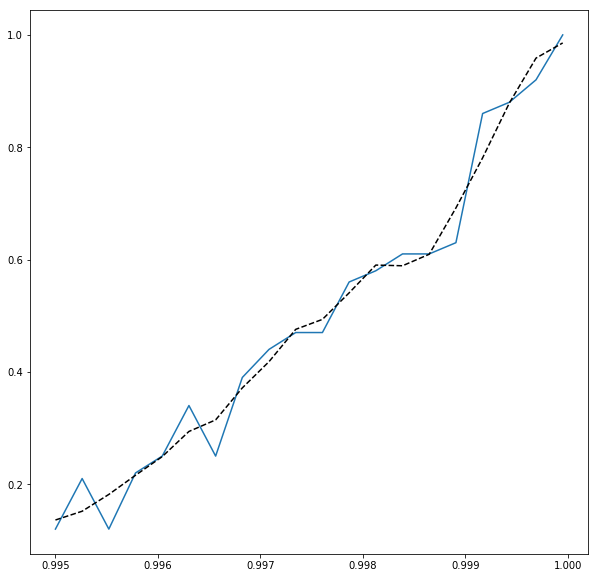

In [70]:
from scipy.signal import savgol_filter

plt.figure(figsize=(10,10))
plt.plot(alpha_s, np.mean(res3, axis=1))
plt.plot(alpha_s, savgol_filter(np.mean(res3, axis=1), 9, 4), 'k--')
plt.show()

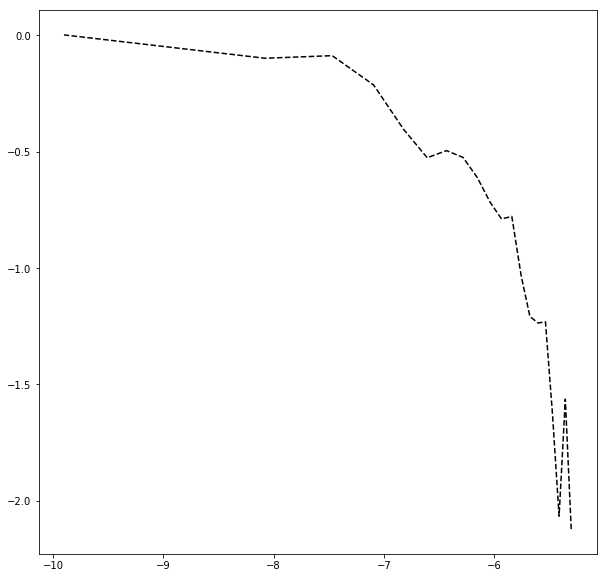

In [71]:
plt.figure(figsize=(10,10))
#plt.plot(alpha_s, np.mean(res3, axis=1))
plt.plot(np.log(1-alpha_s), np.log(savgol_filter(np.mean(res3, axis=1), 9, 6)), 'k--')
plt.show()

In [72]:
res_q=res
res_q2=res2

res_q[res3==1]=np.nan
res_q2[res3==1]=np.nan

In [73]:
res_clean=np.loadtxt('PT12(3)10_20_8000_q_A_cor.out', delimiter=',')
res_clean.shape

(20, 100)

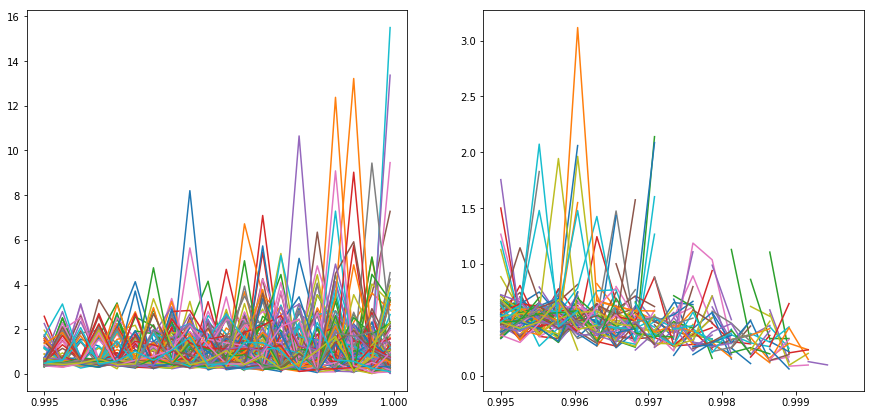

In [74]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
for i in range(sample):
    ax1.plot(alpha_s, res_clean[:, i])
for i in range(sample):
    ax2.plot(alpha_s, res_q[:, i])
#plt.plot(alpha_s, res2[:, -1])    
plt.show()

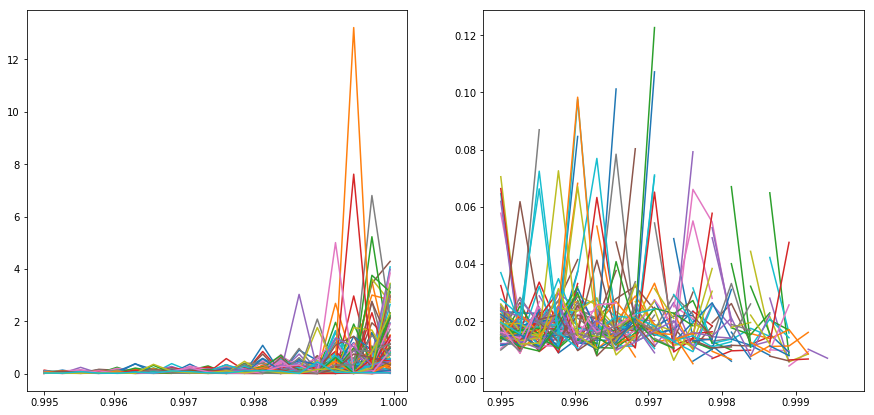

In [75]:
res_clean2=np.loadtxt('PT12(3)10_20_8000_q2_A_cor.out', delimiter=',')
res_clean2.shape

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
for i in range(sample):
    ax1.plot(alpha_s, res_clean2[:, i])
for i in range(sample):
    ax2.plot(alpha_s, res_q2[:, i])
#plt.plot(alpha_s, res2[:, -1])    
plt.show()

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice


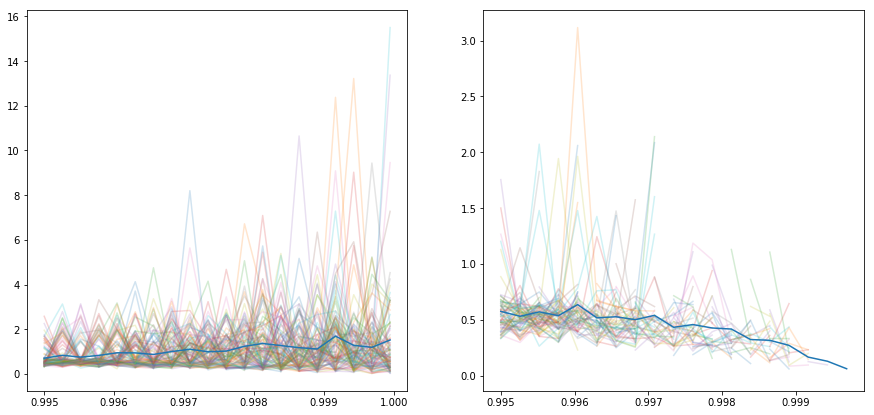

In [76]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
for i in range(sample):
    ax1.plot(alpha_s, res_clean[:, i], alpha=0.2)
ax1.plot(alpha_s, np.mean(res_clean, axis=1))
for i in range(sample):
    ax2.plot(alpha_s, res_q[:, i], alpha=0.2)
ax2.plot(alpha_s, np.nanmean(res_q, axis=1))
#plt.plot(alpha_s, res2[:, -1])    
plt.show()

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice


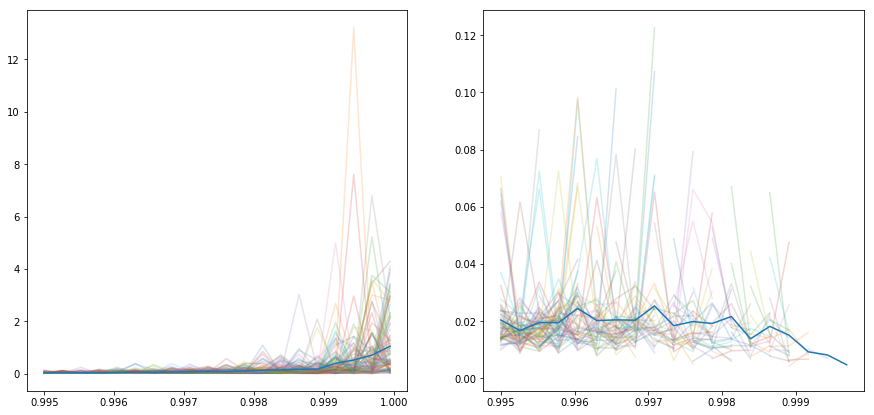

In [77]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
for i in range(sample):
    ax1.plot(alpha_s, res_clean2[:, i], alpha=0.2)
ax1.plot(alpha_s, np.mean(res_clean2, axis=1))
for i in range(sample):
    ax2.plot(alpha_s, res_q2[:, i], alpha=0.2)
ax2.plot(alpha_s, np.nanmean(res_q2, axis=1))
#plt.plot(alpha_s, res2[:, -1])    
plt.show()